# IMPORTING LIBRARIES

In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as pyp

# GET WEB SERVER RESPONSE

In [2]:
def urls(url):
    global response
    response = requests.get(url)
    return response

# URLS

In [3]:
steel = 'https://en-pk.svestonwatches.com/collections/chain-watches-for-men'
leather = 'https://en-pk.svestonwatches.com/collections/mens-leather-watches'
sport = 'https://en-pk.svestonwatches.com/collections/sports-watches-for-men'
formal = 'https://en-pk.svestonwatches.com/collections/mens-formal-dress-watches'

In [4]:
webpages = [steel,leather,sport,formal]
webpages

['https://en-pk.svestonwatches.com/collections/chain-watches-for-men',
 'https://en-pk.svestonwatches.com/collections/mens-leather-watches',
 'https://en-pk.svestonwatches.com/collections/sports-watches-for-men',
 'https://en-pk.svestonwatches.com/collections/mens-formal-dress-watches']

In [5]:
def html(soup):
    return soup

# DATA CLEANING AND FILTERING

In [6]:
def text_steel(soup):
    texts = soup.find_all('div', class_='grid-product__meta ll')
    steel = []
    for txt in texts:
        steel.append(txt.text)
    all_steels = []
    for index,tx in enumerate(steel):
        all_steels.append(tx.split())
    global sale_prices
    sale_prices = []
    for prices in all_steels:
        for index,letters in enumerate(prices[-1]):
            if letters == 's':
                sale_prices.append(prices[-1][index+2:])
    global price
    price = []
    for index,lst in enumerate(all_steels):
        if 'price' not in lst:
            price.insert(index,sale_prices[index])
        else:
            try:
                int(all_steels[index][-3])
                price.append(all_steels[index][-3][:-2])
            except:
                int(all_steels[index][-4])
                price.append(all_steels[index][-4][:-2])
    global brand, names
    brand = []
    names = []
    for index,name in enumerate(all_steels):
        if len(name[1]) == 1:
            names.append(name[2])
            brand.append(name[0])
        elif len(name[1]) == 2:
            hold_temp = name[1] + ' ' + name[2]
            names.append(hold_temp)
            brand.append(name[0])
        else:
            names.append(re.search('\w+',name[1]).group())
            brand.append(name[0])

# FOR STAINLESS STEEL WATCHES

In [7]:
urls(steel)

<Response [200]>

# HTML CONTENT

In [8]:
soup = BeautifulSoup(response.text,'lxml')
html(soup)

<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="en">
<head>
<!-- starapps_core_start -->
<!-- This code is automatically managed by StarApps Studio -->
<!-- Please contact support@starapps.studio for any help -->
<!-- File location: snippets/starapps-core.liquid -->
<script async="" src="https://assets-cdn.starapps.studio/apps/vsk/sveston/script-46916-1685108801.js?shop=sveston.myshopify.com" type="text/javascript"></script>
<!-- VSK_PRE_APP_HIDE_CODE -->
<!-- VSK_PRE_APP_HIDE_CODE_END -->
<script data-no-instant="true" sa-language-info="true" type="application/json">{"current_language":"en", "default_language":"en", "money_format":"Rs.{{amount_no_decimals}}"}</script>
<script async="" src="https://assets-cdn.starapps.studio/apps/vsk/sveston/data-1685022923.js?shop=sveston.myshopify.com" type="text/javascript"></script>
<!-- starapps_core_end -->
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1

In [9]:
text_steel(soup)

# STAINLESS STEEL WATCHES IN DATAFRAME

In [10]:
Data_01 = pd.DataFrame({'Brand':brand,'Model':names,'Price':price,'Sale_Price':sale_prices})
Data_01.head()

,Brand,Model,Price,Sale_Price
0,Sveston,Sultan,"150,000","150,000"
1,SVESTON,MODICCI,13000,"6,999"
2,Sveston,Aristos,13000,"6,999"
3,SVESTON,SOLANO,13500,"8,399"
4,Sveston,Diesel,17999,"9,999"


In [11]:
Data_01.Price.unique(),Data_01.Sale_Price.unique()

(array(['150,000', '13000', '13500', '17999', '13999', '35000', '12500',
        '16000', '22999', '15000', '50000', '17000', '21700', '12000',
        '27000', '15999', '16999', '49,999', '18000', '14000', '10000',
        '14999'], dtype=object),
 array(['150,000', '6,999', '8,399', '9,999', '7,999', '18,699', '8,299',
        '14,999', '8,999', '9,899', '16,899', '7,799', '7,399', '13,499',
        '9,399', '49,999', '8,499', '8,899', '8,599', '5,899', '7,599'],
       dtype=object))

# FOR LEATHER WATCHES

In [12]:
urls(leather)

<Response [200]>

# HTML CONTENT

In [13]:
soup = BeautifulSoup(response.text,'lxml')
html(soup)

<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="en">
<head>
<!-- starapps_core_start -->
<!-- This code is automatically managed by StarApps Studio -->
<!-- Please contact support@starapps.studio for any help -->
<!-- File location: snippets/starapps-core.liquid -->
<script async="" src="https://assets-cdn.starapps.studio/apps/vsk/sveston/script-46916-1685108801.js?shop=sveston.myshopify.com" type="text/javascript"></script>
<!-- VSK_PRE_APP_HIDE_CODE -->
<!-- VSK_PRE_APP_HIDE_CODE_END -->
<script data-no-instant="true" sa-language-info="true" type="application/json">{"current_language":"en", "default_language":"en", "money_format":"Rs.{{amount_no_decimals}}"}</script>
<script async="" src="https://assets-cdn.starapps.studio/apps/vsk/sveston/data-1685022923.js?shop=sveston.myshopify.com" type="text/javascript"></script>
<!-- starapps_core_end -->
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1

# DATA CLEANING AND FILTERING

In [14]:
texts = soup.find_all('div', class_='grid-product__meta ll')
temp_hold = []
for text in texts:
    temp_hold.append(text.text.split())
brand, names, price, sale_prices = [], [], [], []
for per in temp_hold:
    brand.append(per[0])
    names.append(re.search('\w+',per[1]).group())
    sale_prices.append(re.search('\d+[,]\d+',per[-1]).group())
    try:
        int(per[4])
        price.append(per[4][:-2])
    except:
        price.append(per[5][:-2])
        

In [15]:
len(brand),len(names),len(price),len(sale_prices)

(20, 20, 20, 20)

In [16]:
Data_02 = pd.DataFrame({'Brand':brand,'Model':names,'Price':price,'Sale_Price':sale_prices})
Data_02.head()

,Brand,Model,Price,Sale_Price
0,Sveston,Lala,40000,"19,999"
1,Sveston,ZODDOK,15000,"8,999"
2,Sveston,Declan,12999,"5,899"
3,Sveston,Regent,12999,"5,999"
4,Sveston,IRONMAN,17999,"7,999"


In [17]:
Data_02.Price.unique(),Data_02.Sale_Price.unique()

(array(['40000', '15000', '12999', '17999', '16999', '12000', '16000',
        '14000', '18000', '13999', '34999', '11000', '8500'], dtype=object),
 array(['19,999', '8,999', '5,899', '5,999', '7,999', '7,699', '8,399',
        '7,499', '8,899', '9,899', '7,899', '16,499', '6,999', '14,999',
        '4,999', '4,699'], dtype=object))

# FOR SPORTS WATCHES

In [18]:
urls(sport)

<Response [200]>

# HTML CONTENT

In [19]:
soup = BeautifulSoup(response.text,'lxml')
html(soup)

<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="en">
<head>
<!-- starapps_core_start -->
<!-- This code is automatically managed by StarApps Studio -->
<!-- Please contact support@starapps.studio for any help -->
<!-- File location: snippets/starapps-core.liquid -->
<script async="" src="https://assets-cdn.starapps.studio/apps/vsk/sveston/script-46916-1685108801.js?shop=sveston.myshopify.com" type="text/javascript"></script>
<!-- VSK_PRE_APP_HIDE_CODE -->
<!-- VSK_PRE_APP_HIDE_CODE_END -->
<script data-no-instant="true" sa-language-info="true" type="application/json">{"current_language":"en", "default_language":"en", "money_format":"Rs.{{amount_no_decimals}}"}</script>
<script async="" src="https://assets-cdn.starapps.studio/apps/vsk/sveston/data-1685022923.js?shop=sveston.myshopify.com" type="text/javascript"></script>
<!-- starapps_core_end -->
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1

# DATA CLEANING AND FILTERING

In [20]:
texts = soup.find_all('div', class_='grid-product__meta ll')
temp_hold = []
for text in texts:
    temp_hold.append(text.text.split())
brand, names, price, sale_prices = [], [], [], []
for index,per in enumerate(temp_hold):
    brand.append(per[0])
    sale_prices.append(re.search('\d+[,]\d+',per[-1]).group())
    try:
        mod = re.search('\w+',per[1]).group()
        names.append(mod)
    except:
        names.append(per[2])
    if index == 2:
        price.append(per[3][:-2])
        continue
    try:
        if int(per[4]):
            price.append(per[4][:-2])
    except:
        try:
            if int(per[5]):
                price.append(per[5][:-2])
        except:
            if int(per[6]):
                price.append(per[6][:-2])

In [21]:
len(brand),len(names),len(price),len(sale_prices)

(28, 28, 28, 28)

In [22]:
Data_03 = pd.DataFrame({'Brand':brand,'Model':names,'Price':price,'Sale_Price':sale_prices})
Data_03.head()

,Brand,Model,Price,Sale_Price
0,Sveston,ZODDOK,15000,"8,999"
1,Sveston,Iron,18000,"7,999"
2,SVESTON,BOOMSTON,50000,"14,999"
3,Sveston,Monarch,15999,"8,999"
4,Sveston,Diesel,17999,"9,999"


In [23]:
Data_03.Price.unique(),Data_03.Sale_Price.unique()

(array(['15000', '18000', '50000', '15999', '17999', '23999', '22999',
        '39999', '16000', '16999', '35000', '17000', '12000', '14000',
        '27000', '21700', '13999', '13500', '34999', '27999'], dtype=object),
 array(['8,999', '7,999', '14,999', '9,999', '19,999', '9,899', '8,399',
        '8,899', '7,499', '7,899', '18,699', '13,499', '16,899', '16,499',
        '6,999', '15,999'], dtype=object))

# FOR FORMAL WATCHES

In [24]:
urls(formal)

<Response [200]>

# HTML CONTENT

In [25]:
soup = BeautifulSoup(response.text,'lxml')
html(soup)

<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="en">
<head>
<!-- starapps_core_start -->
<!-- This code is automatically managed by StarApps Studio -->
<!-- Please contact support@starapps.studio for any help -->
<!-- File location: snippets/starapps-core.liquid -->
<script async="" src="https://assets-cdn.starapps.studio/apps/vsk/sveston/script-46916-1685108801.js?shop=sveston.myshopify.com" type="text/javascript"></script>
<!-- VSK_PRE_APP_HIDE_CODE -->
<!-- VSK_PRE_APP_HIDE_CODE_END -->
<script data-no-instant="true" sa-language-info="true" type="application/json">{"current_language":"en", "default_language":"en", "money_format":"Rs.{{amount_no_decimals}}"}</script>
<script async="" src="https://assets-cdn.starapps.studio/apps/vsk/sveston/data-1685022923.js?shop=sveston.myshopify.com" type="text/javascript"></script>
<!-- starapps_core_end -->
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1

# DATA CLEANING AND FILTERING

In [26]:
texts = soup.find_all('div', class_='grid-product__meta ll')
temp_hold = []
for text in texts:
    temp_hold.append(text.text.split())
brand, names, price, sale_prices = [], [], [], []
for wtch in temp_hold:
    brand.append(wtch[0])
        
    if len(wtch) == 3:
        names.append(wtch[1])
        price.append(re.search('\d+[,]\d+',wtch[-1]).group())
        sale_prices.append(re.search('\d+[,]\d+',wtch[-1]).group())
        continue
    names.append(re.search('\w+',wtch[1]).group())
    sale_prices.append(re.search('\d+[,]\d+',wtch[-1]).group())
    for index,word in enumerate(wtch):
        if word == 'Sale':
            price.append(wtch[index-1][:-2])
            break

In [27]:
len(brand),len(names),len(price),len(sale_prices)

(31, 31, 31, 31)

In [28]:
Data_04 = pd.DataFrame({'Brand':brand,'Model':names,'Price':price,'Sale_Price':sale_prices})
Data_04.head()

,Brand,Model,Price,Sale_Price
0,Sveston,Sultan,"150,000","150,000"
1,SVESTON,MODICCI,13000,"6,999"
2,Sveston,Aristos,13000,"6,999"
3,Sveston,Oro,12500,"8,299"
4,Sveston,WYNDOW,16000,"9,999"


In [29]:
Data_04['Price'].unique(), Data_04['Sale_Price'].unique()

(array(['150,000', '13000', '12500', '16000', '13500', '50000', '13999',
        '17999', '35000', '12000', '15000', '15999', '14000', '10000',
        '14999', '49,999', '11000', '24999', '8500'], dtype=object),
 array(['150,000', '6,999', '8,299', '9,999', '8,399', '14,999', '7,999',
        '7,399', '7,799', '8,999', '8,899', '9,399', '8,499', '8,599',
        '5,899', '49,999', '4,999', '15,499', '4,699', '7,599'],
       dtype=object))

# ALL MEN WATCHES COLLECTION

In [30]:
DataFrames = [Data_01,Data_02,Data_03,Data_04]
data = pd.concat(DataFrames,ignore_index=True)
data

,Brand,Model,Price,Sale_Price
0,Sveston,Sultan,"150,000","150,000"
1,SVESTON,MODICCI,13000,"6,999"
2,Sveston,Aristos,13000,"6,999"
3,SVESTON,SOLANO,13500,"8,399"
4,Sveston,Diesel,17999,"9,999"
...,...,...,...,...
115,SVESTON,MAJESTIC,24999,"15,499"
116,Sveston,Dressy,8500,"4,699"
117,SVESTON,VEROZI,14000,"8,599"
118,SVESTON,ENDURE,14000,"7,599"


In [31]:
data = data.drop_duplicates(subset=['Model'])
data

,Brand,Model,Price,Sale_Price
0,Sveston,Sultan,"150,000","150,000"
1,SVESTON,MODICCI,13000,"6,999"
2,Sveston,Aristos,13000,"6,999"
3,SVESTON,SOLANO,13500,"8,399"
4,Sveston,Diesel,17999,"9,999"
...,...,...,...,...
68,Sveston,Firestone,39999,"19,999"
70,Sveston,Alpha,16999,"8,999"
82,Sveston,El,21700,"16,899"
88,Sveston,Colossus,27999,"15,999"


# DATA WRANGLING

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 115
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       66 non-null     object
 1   Model       66 non-null     object
 2   Price       66 non-null     object
 3   Sale_Price  66 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB


In [33]:
data.columns

Index(['Brand', 'Model', 'Price', 'Sale_Price'], dtype='object')

In [34]:
data.Brand.unique()

array(['Sveston', 'SVESTON', 'BULLSTON'], dtype=object)

In [35]:
data.Brand = data.Brand.str.upper()

C:\Users\Hp\AppData\Local\Temp\ipykernel_6840\3809176884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Brand = data.Brand.str.upper()


In [36]:
data.Brand.unique()

array(['SVESTON', 'BULLSTON'], dtype=object)

In [37]:
data.Model.unique()

array(['Sultan', 'MODICCI', 'Aristos', 'SOLANO', 'Diesel', 'Victon',
       'Afridi', 'Oro', 'WYNDOW', 'SPECTRUM', 'RASCALJACK', 'BOOMSTON',
       'VANESIO', 'Lala', 'Berlin', 'El Dorado', 'Livingston', 'Colusa',
       'Albany', 'Boomston', 'Oxour', 'DOROLY', 'Prestige', 'Striker',
       'Darling', 'Emperor', 'Visas', 'Sports', 'Iron', 'Thor', 'Tashi',
       'paradox', 'Lariox', 'Povty', 'Royale', 'Thunder', 'Neuara',
       'Ageless', 'VEROZI', 'ENDURE', 'Woati', 'ZODDOK', 'Declan',
       'Regent', 'IRONMAN', 'Trident', 'Seoul', 'Zoddok', 'NOTION',
       'Favous', 'BOLT', 'Allegany', 'ACE', 'HAMMER', 'SV', 'Javelin',
       'SOLO', 'Inspiro', 'Dressy', 'Monarch', 'Aero', 'Firestone',
       'Alpha', 'El', 'Colossus', 'MAJESTIC'], dtype=object)

In [38]:
data.Model = data.Model.str.upper()

C:\Users\Hp\AppData\Local\Temp\ipykernel_6840\2690242778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Model = data.Model.str.upper()


In [39]:
data.Model.unique()

array(['SULTAN', 'MODICCI', 'ARISTOS', 'SOLANO', 'DIESEL', 'VICTON',
       'AFRIDI', 'ORO', 'WYNDOW', 'SPECTRUM', 'RASCALJACK', 'BOOMSTON',
       'VANESIO', 'LALA', 'BERLIN', 'EL DORADO', 'LIVINGSTON', 'COLUSA',
       'ALBANY', 'OXOUR', 'DOROLY', 'PRESTIGE', 'STRIKER', 'DARLING',
       'EMPEROR', 'VISAS', 'SPORTS', 'IRON', 'THOR', 'TASHI', 'PARADOX',
       'LARIOX', 'POVTY', 'ROYALE', 'THUNDER', 'NEUARA', 'AGELESS',
       'VEROZI', 'ENDURE', 'WOATI', 'ZODDOK', 'DECLAN', 'REGENT',
       'IRONMAN', 'TRIDENT', 'SEOUL', 'NOTION', 'FAVOUS', 'BOLT',
       'ALLEGANY', 'ACE', 'HAMMER', 'SV', 'JAVELIN', 'SOLO', 'INSPIRO',
       'DRESSY', 'MONARCH', 'AERO', 'FIRESTONE', 'ALPHA', 'EL',
       'COLOSSUS', 'MAJESTIC'], dtype=object)

In [40]:
data.Price.unique()

array(['150,000', '13000', '13500', '17999', '13999', '35000', '12500',
       '16000', '22999', '15000', '50000', '17000', '21700', '12000',
       '27000', '15999', '16999', '49,999', '18000', '14000', '10000',
       '14999', '12999', '34999', '11000', '8500', '23999', '39999',
       '27999', '24999'], dtype=object)

In [41]:
data.Sale_Price.unique()

array(['150,000', '6,999', '8,399', '9,999', '7,999', '18,699', '8,299',
       '14,999', '8,999', '9,899', '16,899', '7,799', '7,399', '13,499',
       '9,399', '49,999', '8,499', '8,899', '8,599', '5,899', '7,599',
       '5,999', '7,699', '7,499', '7,899', '16,499', '4,999', '4,699',
       '19,999', '15,999', '15,499'], dtype=object)

In [42]:
data.describe()

,Brand,Model,Price,Sale_Price
count,66,66,66,66
unique,2,64,30,31
top,SVESTON,ZODDOK,15000,"7,999"
freq,65,2,7,7


In [43]:
data.columns

Index(['Brand', 'Model', 'Price', 'Sale_Price'], dtype='object')

In [44]:
data.Brand.value_counts()

SVESTON     65
BULLSTON     1
Name: Brand, dtype: int64

In [45]:
hold = data.Model.value_counts()
hold

ZODDOK      2
BOOMSTON    2
SULTAN      1
BOLT        1
NEUARA      1
           ..
IRON        1
THOR        1
TASHI       1
PARADOX     1
MAJESTIC    1
Name: Model, Length: 64, dtype: int64

In [46]:
hold = hold[:4]
hold

ZODDOK      2
BOOMSTON    2
SULTAN      1
BOLT        1
Name: Model, dtype: int64

In [47]:
len(hold)

4

# VISUALISATION OF INSIGHTS

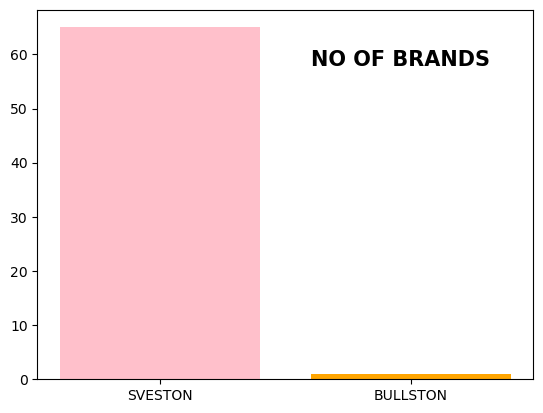

In [48]:
pyp.bar(data.Brand.value_counts().index,data.Brand.value_counts().values,color=['pink','orange'])
ax = pyp.gca()
ax.text(0.6,58,'NO OF BRANDS',weight='bold',fontsize=15)
pyp.show()

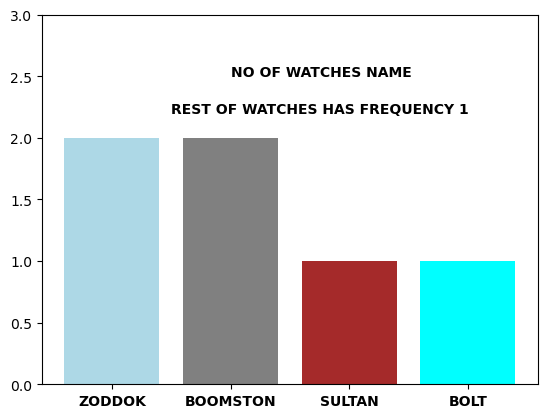

In [49]:
pyp.ylim(0,3)
pyp.bar(hold.index,hold.values,color=['lightblue','grey','brown','aqua'])
ax = pyp.gca()
ax.text(1,2.5,'NO OF WATCHES NAME',weight='bold')
ax.text(0.5,2.2,'REST OF WATCHES HAS FREQUENCY 1',weight='bold')
pyp.xticks(weight='bold')
pyp.show()

In [50]:
data['Price'] = data['Price'].str.replace(',','')
data['Price'] = data['Price'].astype(int)

C:\Users\Hp\AppData\Local\Temp\ipykernel_6840\2689351803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace(',','')
C:\Users\Hp\AppData\Local\Temp\ipykernel_6840\2689351803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].astype(int)


In [51]:
data['Sale_Price'] = data['Sale_Price'].str.replace(',','')
data['Sale_Price'] = data['Sale_Price'].astype(int)

C:\Users\Hp\AppData\Local\Temp\ipykernel_6840\3395182617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sale_Price'] = data['Sale_Price'].str.replace(',','')
C:\Users\Hp\AppData\Local\Temp\ipykernel_6840\3395182617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sale_Price'] = data['Sale_Price'].astype(int)


In [52]:
temp = data[data['Price']>30000]
temp = temp.reset_index(drop=True)
temp

,Brand,Model,Price,Sale_Price
0,SVESTON,SULTAN,150000,150000
1,SVESTON,AFRIDI,35000,18699
2,SVESTON,BOOMSTON,50000,14999
3,SVESTON,LALA,35000,14999
4,SVESTON,EMPEROR,49999,49999
5,SVESTON,SOLO,34999,14999
6,SVESTON,FIRESTONE,39999,19999


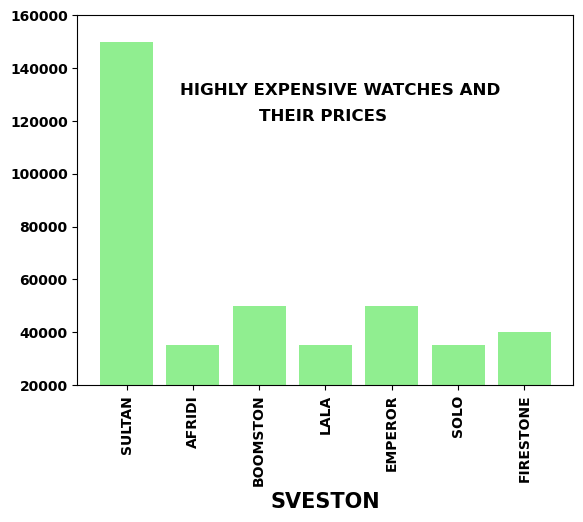

In [53]:
pyp.ylim(20000,160000)
pyp.bar(temp['Model'],temp['Price'],color=['lightgreen'])
pyp.xticks(rotation=90,weight='bold')
pyp.yticks(weight='bold')
pyp.xlabel('SVESTON',weight='bold',fontsize=15)
ax = pyp.gca()
ax.text(0.8,130000,'HIGHLY EXPENSIVE WATCHES AND',weight='bold',fontsize=12)
ax.text(2,120000, 'THEIR PRICES',weight='bold',fontsize=12)
pyp.show()

In [54]:
temp_hold = data[data['Price']<30000]
temp_hold = temp_hold.reset_index(drop=True)
temp_hold = temp_hold.sort_values(by='Price', ascending=True)

In [55]:
temp_hold = temp_hold.reset_index(drop=True)
temp_hold

,Brand,Model,Price,Sale_Price
0,SVESTON,DRESSY,8500,4699
1,SVESTON,POVTY,10000,6999
2,SVESTON,AGELESS,10000,5899
3,SVESTON,LARIOX,10000,6999
4,SVESTON,INSPIRO,11000,4999
5,SVESTON,LIVINGSTON,12000,7799
6,SVESTON,ALBANY,12000,7399
7,SVESTON,NOTION,12000,7499
8,SVESTON,COLUSA,12000,7799
9,SVESTON,ORO,12500,8299


In [56]:
hold = temp_hold[:15]
hold

,Brand,Model,Price,Sale_Price
0,SVESTON,DRESSY,8500,4699
1,SVESTON,POVTY,10000,6999
2,SVESTON,AGELESS,10000,5899
3,SVESTON,LARIOX,10000,6999
4,SVESTON,INSPIRO,11000,4999
5,SVESTON,LIVINGSTON,12000,7799
6,SVESTON,ALBANY,12000,7399
7,SVESTON,NOTION,12000,7499
8,SVESTON,COLUSA,12000,7799
9,SVESTON,ORO,12500,8299


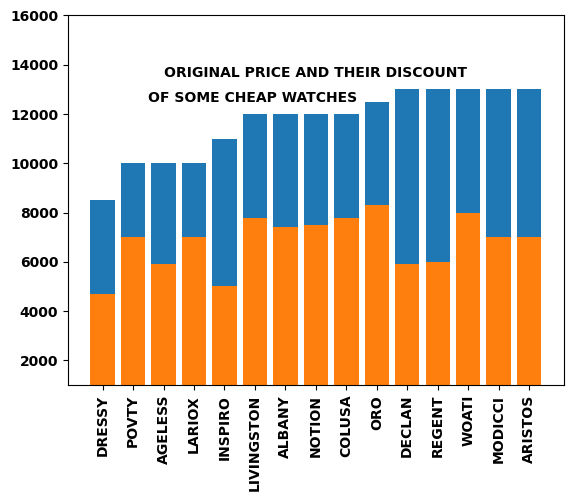

In [57]:
pyp.ylim(1000,16000)
pyp.bar(hold['Model'],hold['Price'])
pyp.bar(hold['Model'],hold['Sale_Price'])
pyp.xticks(rotation=90,weight='bold')
pyp.yticks(weight='bold')
ax = pyp.gca()
ax.text(2,13500,'ORIGINAL PRICE AND THEIR DISCOUNT',weight='bold')
ax.text(1.5,12500,'OF SOME CHEAP WATCHES',weight='bold')
pyp.show()